<a href="https://colab.research.google.com/github/TimkaThymineTimiryazevskaya/sf_data_science/blob/main/ChurnData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:

import plotly
import plotly.express as px

In [12]:
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

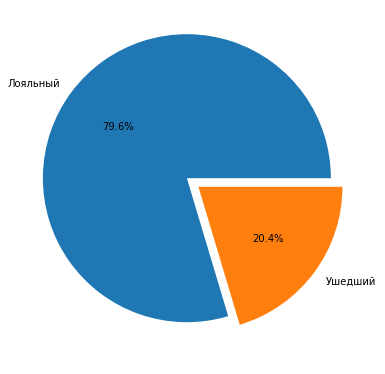

In [8]:
loyalty = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyalty, 
    labels=['Лояльный', 'Ушедший'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);

Вывод: Судя по графику, лояльными являются порядка 80% клиентов

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

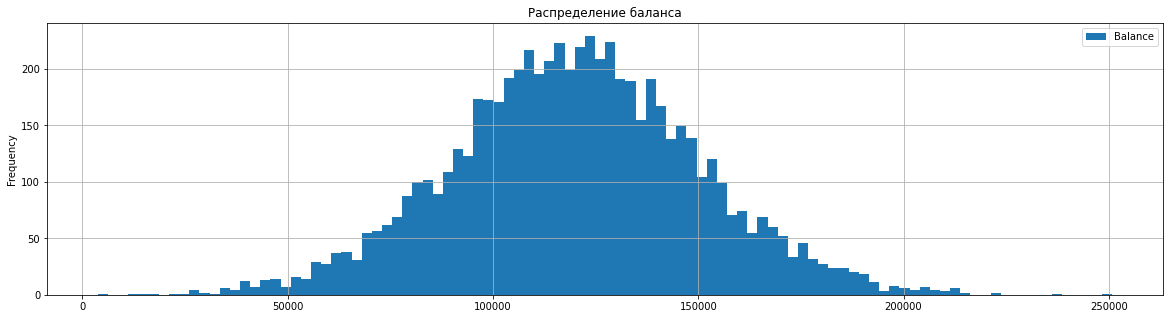

In [39]:
grouped_clients = churn_data[churn_data['Balance']>2500]['Balance']
grouped_clients.plot(
    kind='hist',
    figsize=(20, 5),
    title='Распределение баланса',
    legend = ['Лояльные', 'Ушедшие'],
    grid = True,
    bins = 100
);

Как видно из распределения, оно является близким к нормальному. Пиковое значение достигается при балансе в диапазоне от 100 до 140 тысяч на счете.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

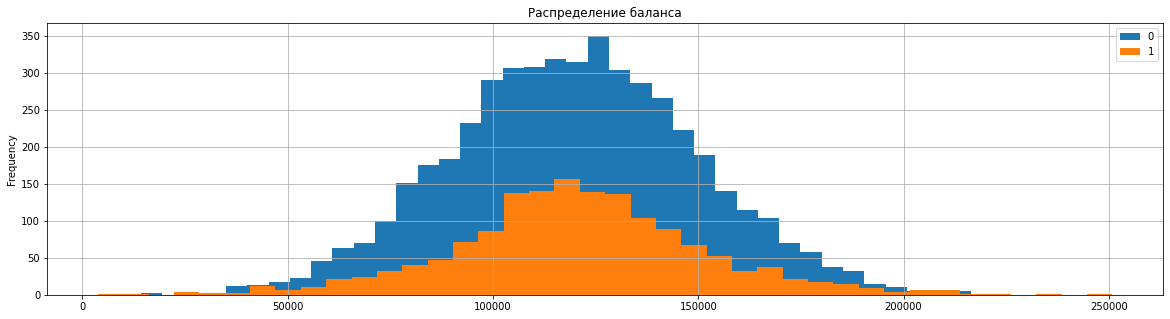

In [47]:
grouped_clients = churn_data[churn_data['Balance']>2500].groupby('Exited')['Balance']
grouped_clients.plot(
    kind='hist',
    figsize=(20, 5),
    title='Распределение баланса',
    legend = ['Лояльные', 'Ушедшие'],
    grid = True,
    bins = 40
);

Распределение баланса представлено для клиентов с балансом больше 2500. Баланс ушедших клиентов также имеет нормальное распределение, однако количество таких клиентов меньше (примерно в 2-2,5 раза) и распределение больше сдвинуто к диапазону 100-125 тысяч. Клиентов могут не устраивать предложения банка, условия обслуживания, или их конкуренты могут иметь более выгодные условия.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

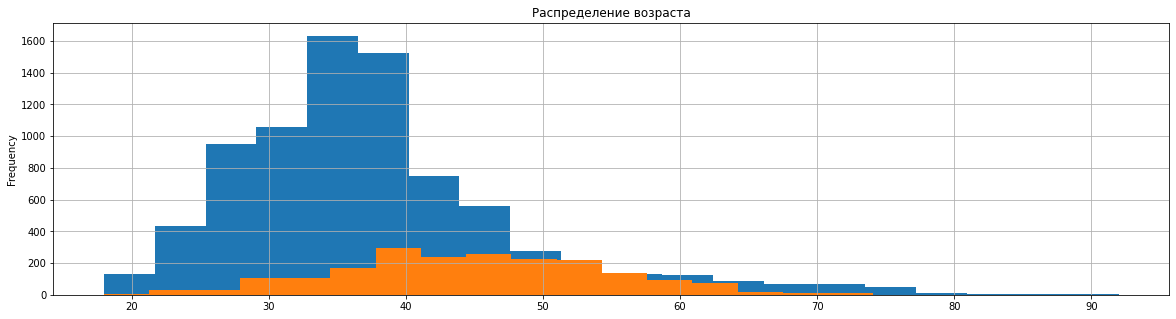

In [52]:
grouped_clients = churn_data.groupby('Exited')['Age']
grouped_clients.plot(
    kind='hist',
    figsize=(20, 5),
    title='Распределение возраста',
    grid = True,
    bins = 20
);

Вывод: Возраст основной группы лояльных клиентов - в районе 35 лет. При этом банку следует обратить внимание на клиентов в районе 40-50 лет. Эта категория является наибольшей среди ушедших клиентов. 

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

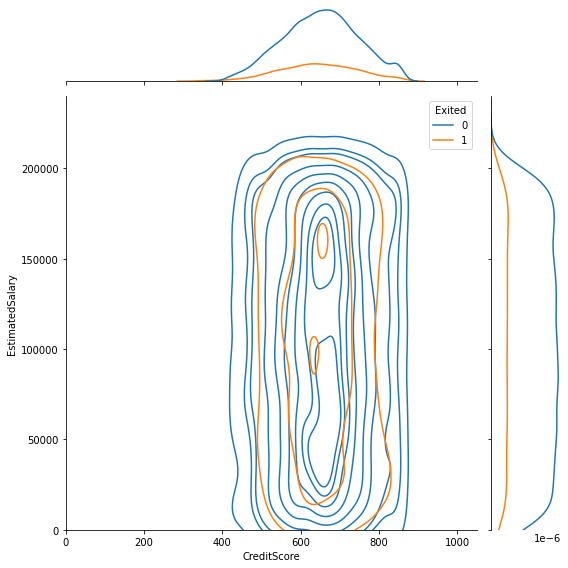

In [69]:
jointplot = sns.jointplot(
    data= churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (0, churn_data['CreditScore'].max()+200),
    ylim = (0, churn_data['EstimatedSalary'].max()*1.2),
    height=8, kind = 'kde'
)

Вывод: Четкой взаимосвязи между признаками нет. Можно отметить наличие большую концентрацию клиентов при кредитном рейтинге в районе 600-650 и ожидании зарплаты в районе 100 тысяч, а также 150-175 тысяч.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

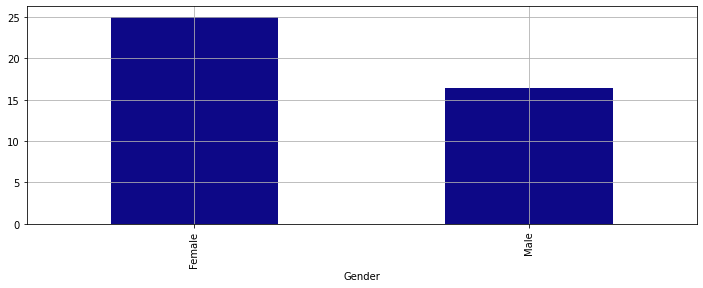

In [95]:
gender_dist = churn_data.groupby('Gender')['Exited'].mean()*100
gender_dist.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

Вывод: Среди женщин ушедшими являются 25% клиентов, а среди мужчин уходят чуть больше 15%

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0.5, 1.0, 'Количество приобретенных услуг')

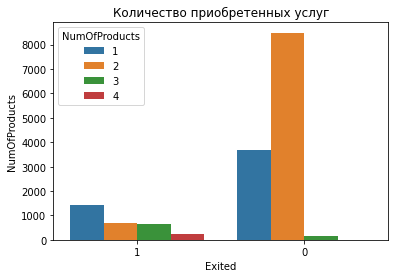

In [192]:
barplot = sns.barplot(
    data=churn_data,
    x= 'Exited',
    y='NumOfProducts',
    hue='NumOfProducts', estimator = sum
)
barplot.set_title('Количество приобретенных услуг')

Вывод: Большинство уходящих клиентов приобретали только 1 услугу. Банк должен стремиться к представлению большего выбора услуг, чтобы удержать клиентов.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

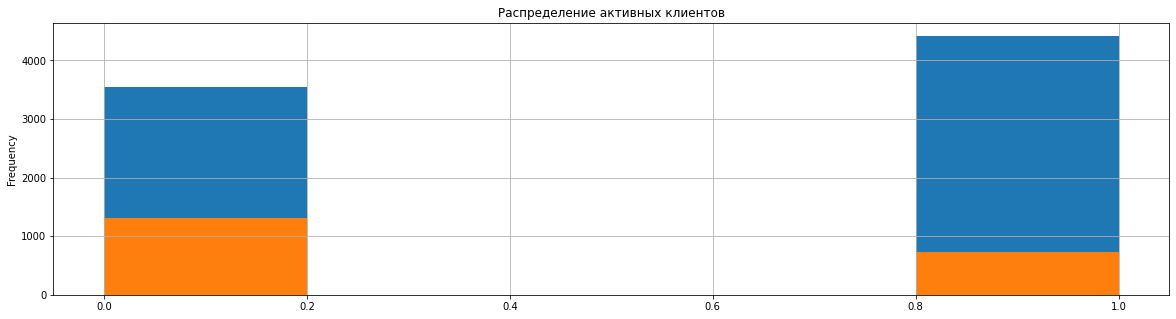

In [159]:
grouped_clients = churn_data.groupby('Exited')['IsActiveMember']
grouped_clients.plot(
    kind='hist',
    figsize=(20, 5),
    title='Распределение активных клиентов',
    grid = True,
    bins = 5
);

Вывод: Основной отток клиентов происходит среди неактивных пользователей. Для улучшения активности стоит производить таргетированную кампанию по созданию условий, при которых клиенты будут пользоваться условиями банка: предложение особых кредитных условий, сниженные ипотечные ставки, повышенный кэшбэк.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [32]:
choropleth_data = churn_data.groupby(by='Geography')['Exited'].mean()



fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations=(choropleth_data.index), 
    locationmode = "country names", 
    color="Exited", 
    range_color=[0, 1], 
    title='Уход клиентов', 
    width=800, 
    height=500, 
    color_continuous_scale="Reds"
)


fig.show()

Вывод: Самый большой отток клиентов наблюдается в Германии. Отток составляет 32% от общего количества клиентов страны.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [33]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [36]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
data_tenure = churn_data.pivot_table(index = ['CreditScoreCat'], columns = ['Tenure'], values = ['Exited'], aggfunc = 'mean')
display(data_tenure)

Exited                                                    \
Tenure                0         1         2         3         4         5    
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

                                                                  
Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229508  0.333333

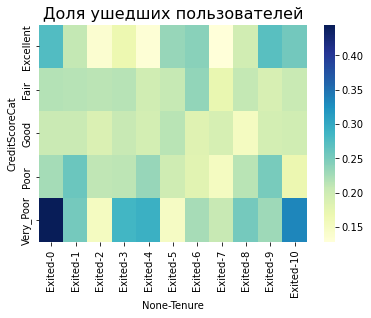

In [37]:
heatmap = sns.heatmap(data=data_tenure, cmap='YlGnBu')
heatmap.set_title('Доля ушедших пользователей', fontsize=16);

Вывод: Большинство клиентов, уходящих из банка имеют самых плохой кредитный рейтинг и пользуются услугами банка менее 1 года. На втором месте по уходу - клиенты банка с самым плохим кредитным рейтингом и пользованием услуг банка в течение 10 лет.